### Hand Written NUmber Predection Using SImple ANN on MNIST DATA:-

```
Load DataSets:-

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense,BatchNormalization
from keras.models import Sequential
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.layers import Dropout
from keras import regularizers

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

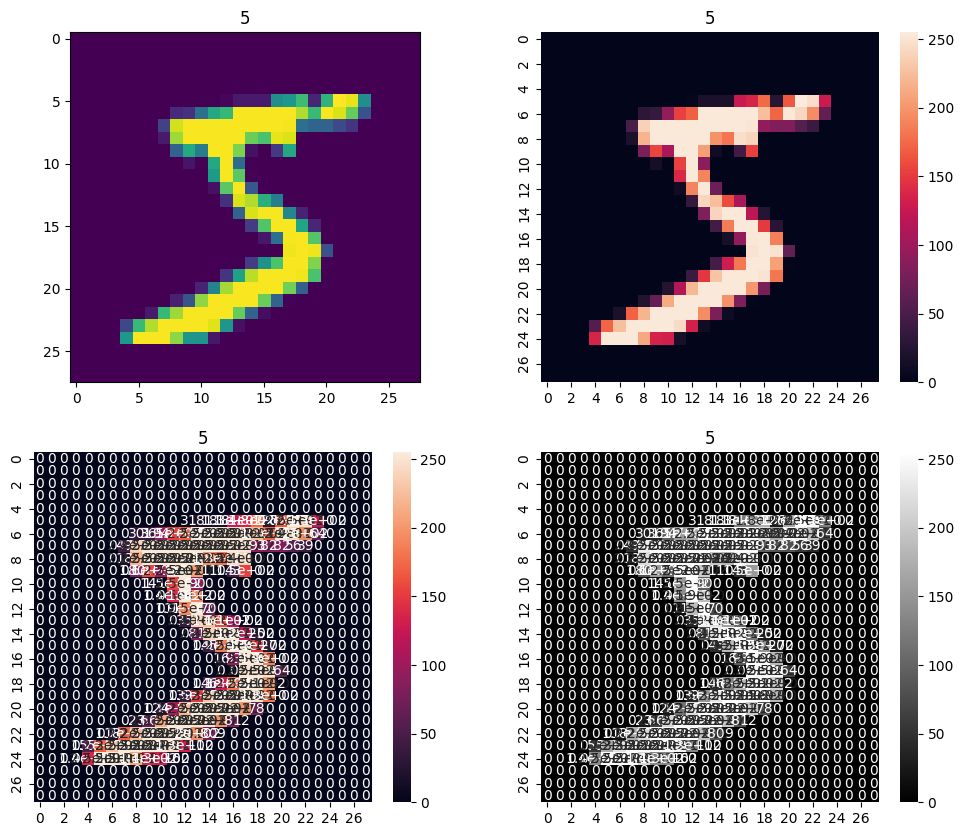

In [3]:
plt.figure(figsize=(12,10))

# Figure-1
plt.subplot(2,2,1)
plt.title(Y_train[0])
plt.imshow(X_train[0],)



# Figure-2
plt.subplot(2,2,2)
plt.title(Y_train[0])
sns.heatmap(X_train[0])


# Figure-3
plt.subplot(2,2,3)
plt.title(Y_train[0])
sns.heatmap(X_train[0],annot=True)


# Figure-4
plt.subplot(2,2,4)
plt.title(Y_train[0])
sns.heatmap(X_train[0],annot=True,cmap="gray")

plt.show()

In [4]:
x_valid,x_train=X_train[:5000]/ 255., X_train[5000:]/ 255.
y_valid,y_train=Y_train[:5000],Y_train[5000:]
x_test=X_test/ 255.
y_test=Y_test

In [5]:
x_valid.shape,y_valid.shape

((5000, 28, 28), (5000,))

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((55000, 28, 28), (55000,), (10000, 28, 28), (10000,))

```
crest
sns.cubehelix_palette(as_cmap=True)
grey
Grays

In [7]:
x_train.shape[1],x_train.shape[2]

(28, 28)

<Axes: >

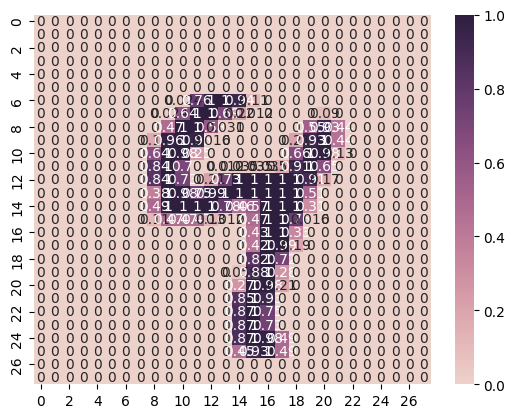

In [8]:
sns.heatmap(x_train[2],cmap=sns.cubehelix_palette(as_cmap=True),annot=True)

In [25]:
LAYERS=[
    # Here We can Directly Flatten our input image 
    keras.layers.Flatten(input_shape=[28,28],name="Input_Layer"),
    # Add BatchNormalization for preventing Overfitting and prevent to the internal covarient shift
    keras.layers.BatchNormalization(),
    
    # In this layer we can add a Dense layer with 300 neurons with relu activation function.
    keras.layers.Dense(300,activation="relu",name="Hidden_Layer1"),
    # Add BatchNormalization for preventing Overfitting and prevent to the internal covarient shift
    keras.layers.BatchNormalization(),
    # Add a Dropout layer by which 20 percentages of neurons are dead
    keras.layers.Dropout(0.2),
    # In this layer we can add a Dense layer with 100 neurons with relu activation function.
    keras.layers.Dense(100,activation="relu",name="Hidden_Layer2"),
    # Add BatchNormalization for preventing Overfitting and prevent to the internal covarient shift
    keras.layers.BatchNormalization(),
    # Add a Dropout layer by which 20 percentages of neurons are dead
    keras.layers.Dropout(0.2),
    # In this layer we can add a Dense layer with 10 neurons with softmax activation function.
    keras.layers.Dense(10,activation="softmax",name="Output_Layer")
    ]

c:\Users\Abhi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model=Sequential(LAYERS)

In [11]:
28*28*300

235200

```
First layer=28 x 28=784
second layer= 784 x 300 +300=235500  , where +300 is our bias for this layers
third layer= 300 x 100 + 100= 30,100 , where +100 is our bias for this layers
Final layer= 300 x 100 + 10 = 1,010 , where +10 is our bias for this layers


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer1 (Dense)           │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [13]:
erl=EarlyStopping(monitor="val_loss",patience=10)
check=ModelCheckpoint(monitor="val_loss",filepath="model_h5.keras",save_best_only=True)
board=TensorBoard(log_dir='abhishek.logs')

Callbacks=[erl,check,board]

In [14]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
            optimizer=OPTIMIZER,
            metrics=METRICS)


```
Model Fitting for 30 epochs and batch size=128 

In [15]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid),batch_size=128,callbacks=board)

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6337 - loss: 1.1771 - val_accuracy: 0.9130 - val_loss: 0.3103
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8842 - loss: 0.3905 - val_accuracy: 0.9292 - val_loss: 0.2411
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9067 - loss: 0.3108 - val_accuracy: 0.9388 - val_loss: 0.2089
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9205 - loss: 0.2669 - val_accuracy: 0.9464 - val_loss: 0.1875
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9274 - loss: 0.2440 - val_accuracy: 0.9492 - val_loss: 0.1736
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9323 - loss: 0.2252 - val_accuracy: 0.9522 - val_loss: 0.1616
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9385 - loss: 0.2049 - val_accuracy: 0.9534 - val_loss: 0.1535
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9406 - loss: 0.1996 - val_accuracy: 0

In [16]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.773782,0.734157,0.9130,0.310262
1,0.890764,0.367361,0.9292,0.241127
2,0.910764,0.299974,0.9388,0.208862
3,0.920909,0.264529,0.9464,0.187507
4,0.928945,0.237267,0.9492,0.173646
5,0.933527,0.219596,0.9522,0.161624
6,0.938218,0.206385,0.9534,0.153492
7,0.942655,0.193160,0.9562,0.146462
8,0.944927,0.181626,0.9576,0.139621
9,0.948291,0.171760,0.9586,0.135046


<Axes: >

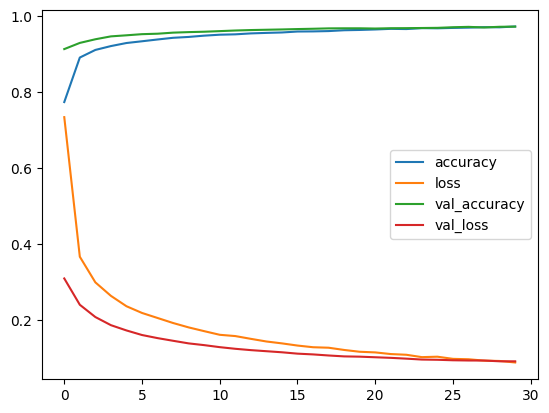

In [17]:
pd.DataFrame(history.history).plot()

```
Model performence

In [18]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9655 - loss: 0.1081


[0.0940917581319809, 0.970300018787384]

```
Model testing on test test

In [19]:
x_new=x_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [20]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [21]:
y_prob=model.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.006, 0.008, 0.976, 0.   , 0.   , 0.006, 0.004, 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [22]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

#######


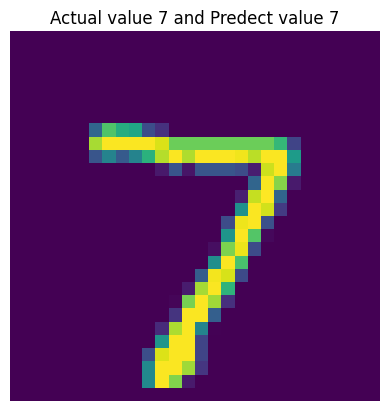

#######


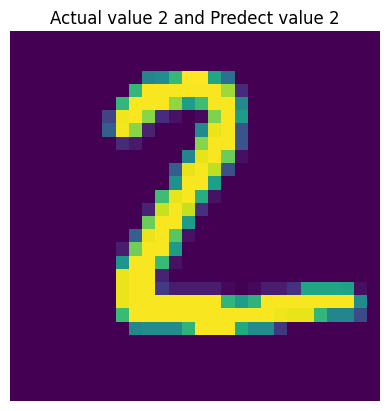

#######


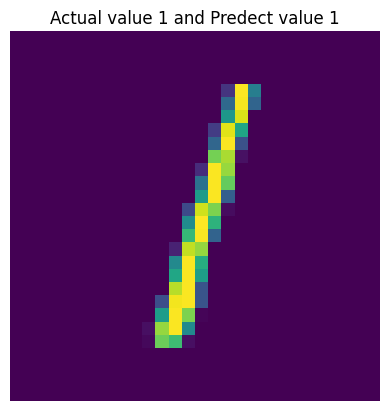

In [23]:
for data ,actual_val,predect_val in zip(x_new,actual,y_pred):
    plt.title(f"Actual value {actual_val} and Predect value {predect_val}")
    plt.imshow(data)
    plt.axis("off")
    print("#######")
    plt.show()

```
Save model

In [24]:
# model.save("abhi.h5")